# (Effects of Bike Ride Attibutes on the Duration of the Ride )
## by (Omer Moussa)

## Investigation Overview

> I aim to investigate the relationship between some variables and the duration of the ride. I am looking at the distributions of some features that might have an effect on the duration, then I proceed with bivariate and multivariate plots.

## Dataset Overview

> The dataset consists of 183412 instances and 16 cols ['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip']. 8265 rows were dropped due to the existence on Nans
  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df['dist']=100*((df.end_station_latitude-df.start_station_latitude)**2+(df.end_station_longitude-df.start_station_longitude)**2)**.5

In [10]:
df.dropna(inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> This depicts the distribution of the distance variable. This logically must be the most relevant feature when predicting the duration of the ride. This distribution is right skewed with a mean of about 1.4.

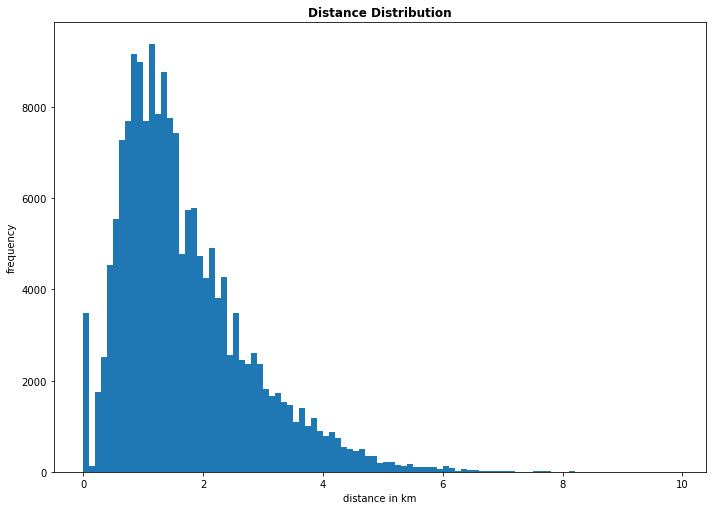

In [60]:
# bins of size 0.05
bins = np.arange(0, 10, 0.1)
plt.figure(figsize=[ 11.69, 8.27]);

plt.hist(data=df,x='dist',bins=bins);
plt.xlabel('distance in km');
plt.ylabel("frequency");
plt.title("Distance Distribution", weight='bold');


## (Visualization 2)

> This visulization plots the corelation between the distance and the duration of the ride. There is a slight upward trend, but it is not strong to be considered a direct relation (it's noisy when dist <6)

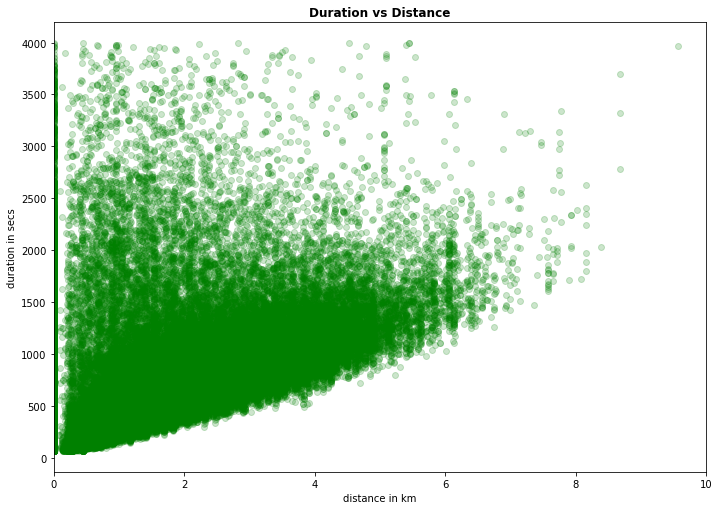

In [54]:
new_df=df[df.duration_sec<4000]
plt.figure(figsize=[ 11.69, 8.27]);

sb.regplot(data=new_df,x='dist',y='duration_sec',scatter_kws={'alpha':0.2},fit_reg=False, color='green');

plt.xlim([0,10]);
plt.xlabel('distance in km')
plt.ylabel('duration in secs')
plt.title("Duration vs Distance", weight='bold');

## (Visualization 3)

This visualization depicts the duration distance relationship but it's splitted by gender to see how gender affects this relationship. It seems that there is no relation. all subplots appear to have similar ranges in x and y axes.


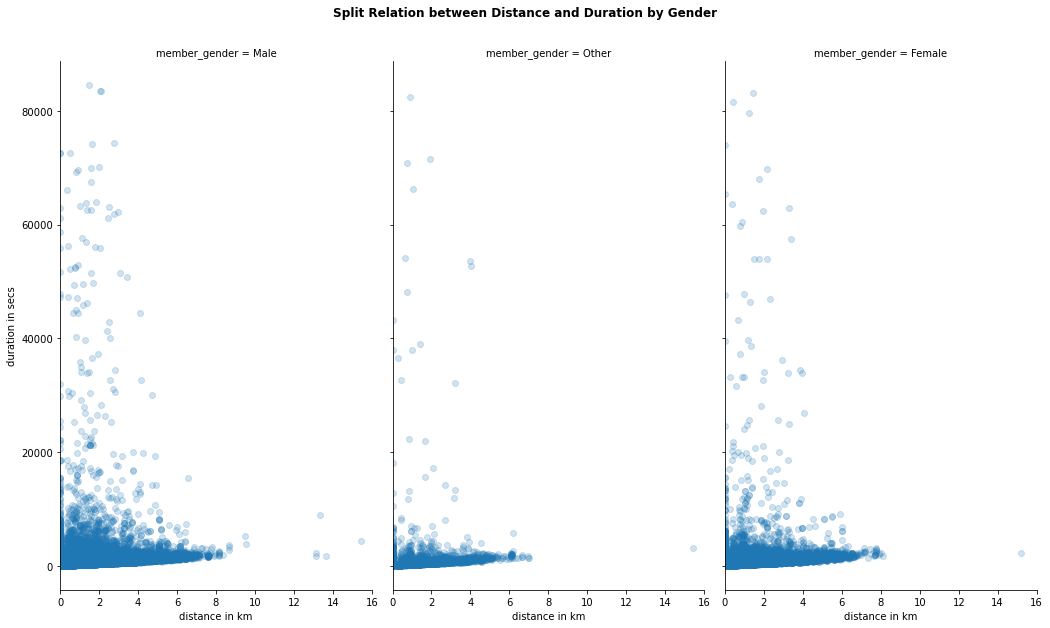

In [52]:
def facet_grid(cat_fet,x,y,x_lim=None,y_lim=None):

    g=sb.FacetGrid(data=df,col=cat_fet,xlim=x_lim,height= 8.27, aspect = 14.70/3/8.27)
    g.map(plt.scatter,x,y,alpha=0.2)
    
    g.set_axis_labels(x_var="distance in km", y_var="duration in secs")

    plt.suptitle("Split Relation between Distance and Duration by Gender",y=1.05, weight='bold')

# split by gender and observe distance with duration
facet_grid('member_gender','dist','duration_sec',[0,16])

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!